<a href="https://colab.research.google.com/github/Kashew765/MachineLearning/blob/main/facebook_dataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [6]:
df = pd.read_csv("Facebook_Marketplace_data.csv")
# Convert status_published to datetime format
df["status_published"] = pd.to_datetime(df["status_published"], errors='coerce')


 1. How does the time of upload affect num_reaction?

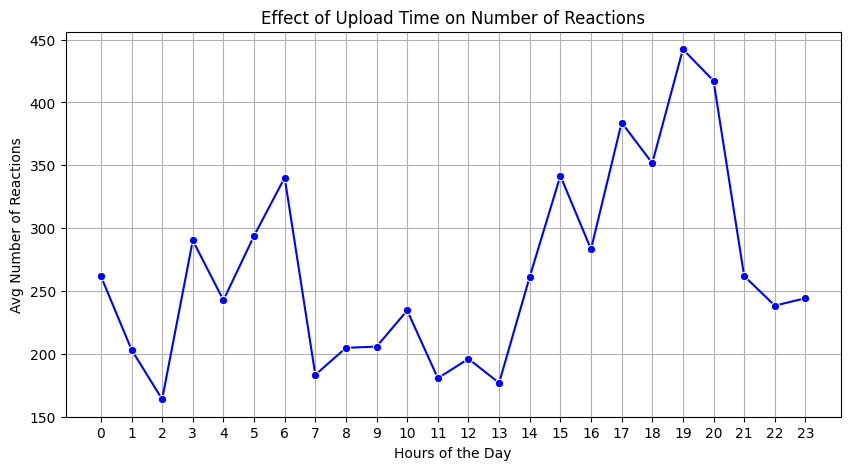

In [7]:
df["hour"] = df["status_published"].dt.hour
hourly_reactions = df.groupby("hour")["num_reactions"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_reactions.index, y=hourly_reactions.values, marker="o", linestyle="-", color="b")
plt.xlabel("Hours of the Day")
plt.ylabel("Avg Number of Reactions")
plt.title("Effect of Upload Time on Number of Reactions")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

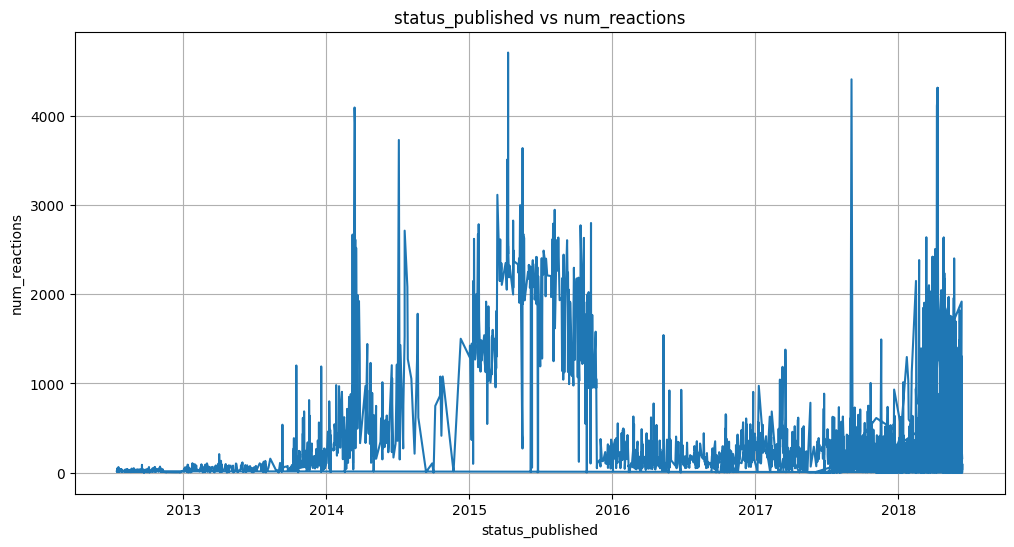

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['status_published'],df['num_reactions'])
plt.title('status_published vs num_reactions')
plt.xlabel('status_published')
plt.ylabel('num_reactions')
plt.grid(True)
plt.show()

2. Correlation between num_reactions, num_comments, num_shares

In [9]:
correlation_matrix = df[["num_reactions", "num_comments", "num_shares"]].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


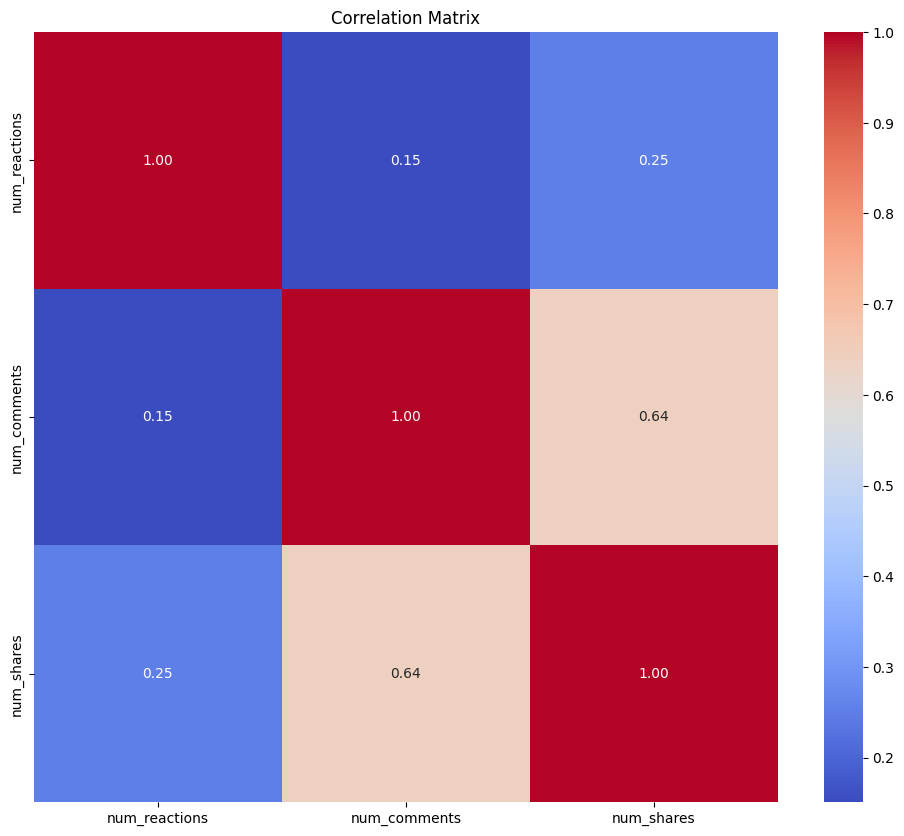

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df[["num_reactions", "num_comments", "num_shares"]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

3. K-Means Clustering

Text(0, 0.5, 'wcss')

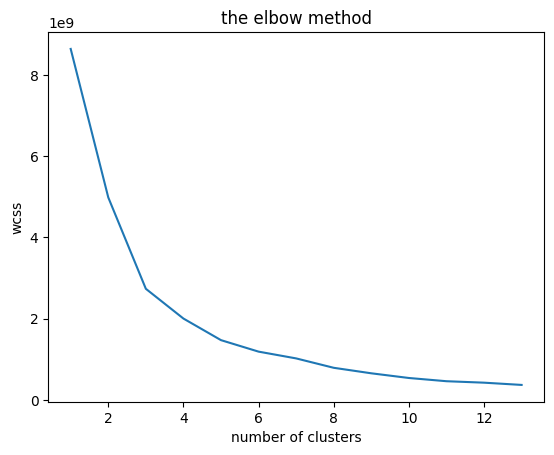

In [24]:
features =['num_reactions', 'num_comments', 'num_shares','num_likes','num_loves', 'num_wows', 'num_hahas', 'num_sads','num_angrys']
X = df[features]
wcss=[]
for i in range(1,14):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)
plt.plot(range(1,14),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')

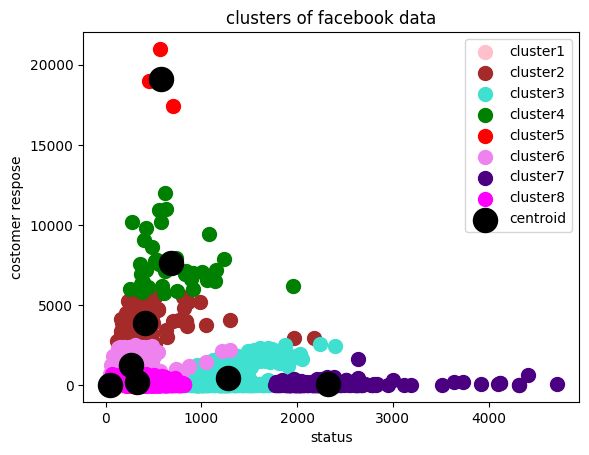

In [32]:
kmeans=KMeans(n_clusters=8,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)
plt.scatter(X[y_kmeans==0].iloc[:,0],X[y_kmeans==0].iloc[:,1],s=100,c='pink',label='cluster1')
plt.scatter(X[y_kmeans==1].iloc[:,0],X[y_kmeans==1].iloc[:,1],s=100,c='brown',label='cluster2')
plt.scatter(X[y_kmeans==2].iloc[:,0],X[y_kmeans==2].iloc[:,1],s=100,c='turquoise',label='cluster3')
plt.scatter(X[y_kmeans==3].iloc[:,0],X[y_kmeans==3].iloc[:,1],s=100,c='green',label='cluster4')
plt.scatter(X[y_kmeans==4].iloc[:,0],X[y_kmeans==4].iloc[:,1],s=100,c='red',label='cluster5')
plt.scatter(X[y_kmeans==5].iloc[:,0],X[y_kmeans==5].iloc[:,1],s=100,c='violet',label='cluster6')
plt.scatter(X[y_kmeans==6].iloc[:,0],X[y_kmeans==6].iloc[:,1],s=100,c='indigo',label='cluster7')
plt.scatter(X[y_kmeans==7].iloc[:,0],X[y_kmeans==7].iloc[:,1],s=100,c='magenta',label='cluster8')
#kmeans centriod
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
s=300,c='black',label='centroid')
plt.title("clusters of facebook data")
plt.xlabel('status')
plt.ylabel('costomer respose')
plt.legend()
plt.show()


4. Using the elbow method to find the optimal number of clusters

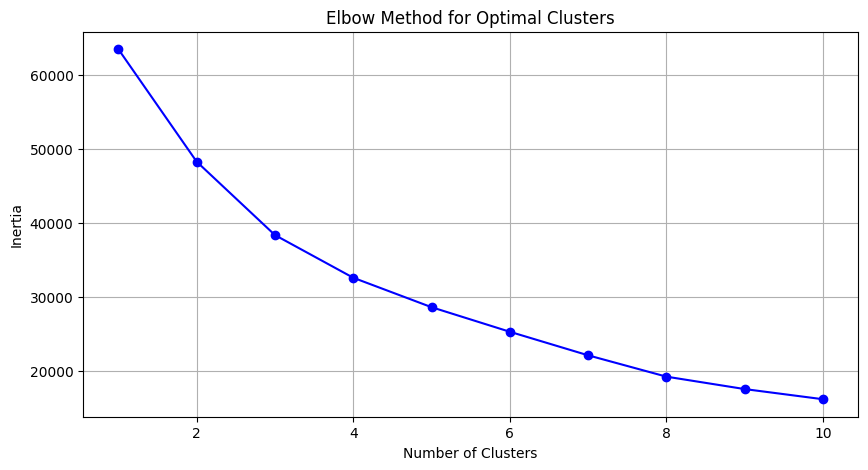

In [ ]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-', markersize=6)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.grid(True)
plt.show()
# Choosing k=3 (assumption) and training K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df_scaled)


5. Count of different types of posts

In [ ]:
post_type_counts = df["status_type"].value_counts()
print("Count of Post Types:\n", post_type_counts)

Count of Post Types:
 status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64



6. Average values of num_reactions, num_comments, num_shares per post type

In [ ]:
post_type_avg = df.groupby("status_type")[["num_reactions", "num_comments", "num_shares"]].mean()
print("Average Values by Post Type:\n", post_type_avg)

Average Values by Post Type:
              num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
